In [ ]:
#from google.colab import drive
#drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =  pd.read_csv('/content/gdrive/My Drive/Part 2.2/Artificial Intelligence/diabetes.csv') 

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Cleaning data**

In [ ]:
#checking for missing data
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#correlation with outcome
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)


Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

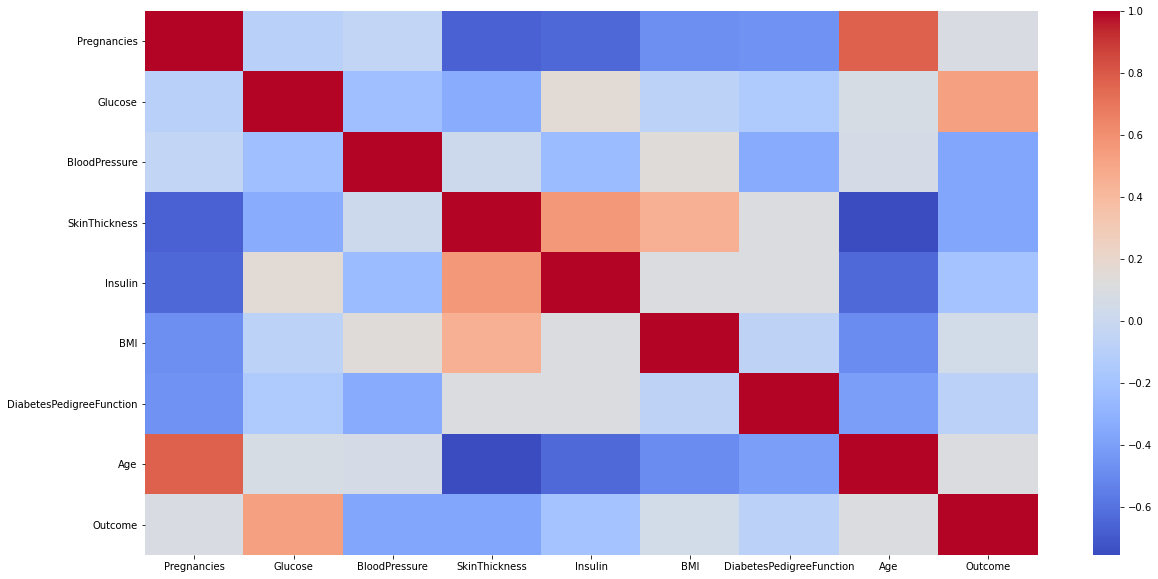

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix.corr(),yticklabels=True,cbar=True, cmap='coolwarm')

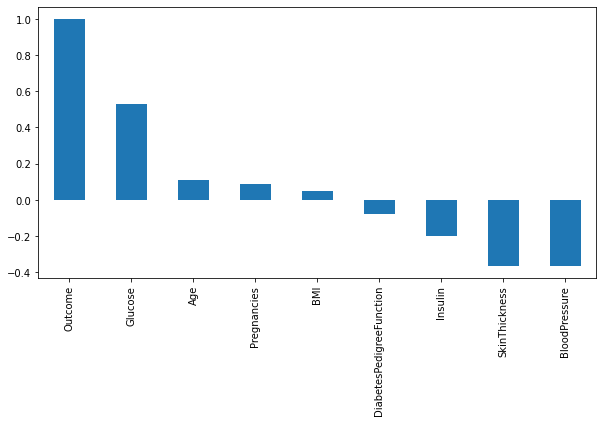

In [ ]:
plt.figure(figsize=(15,10))
corr_matrix.corr()['Outcome'].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

In [ ]:
#scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]=scaler.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [ ]:
#dividing data for training
X=df.drop('Outcome', axis=1)
Y=df['Outcome']

In [ ]:
#training the data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set), "train +", len(test_set), "test")

614 train + 154 test


In [ ]:
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
#trying to use an ensemble learning 6 classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix #import confusion_matrix

log_clf = LogisticRegression(intercept_scaling=0.8)
rnd_clf = RandomForestClassifier( n_estimators=500, max_depth=5,max_leaf_nodes=20 )
abc_clf = AdaBoostClassifier(n_estimators=200, learning_rate=1)
dt_clf = DecisionTreeClassifier(criterion = 'gini', min_samples_split=2, min_samples_leaf=2,splitter='best' )
xgb_clf = XGBClassifier( min_child_weight=2, gamma=5, subsample=1, colsample_bytree=0.7, max_depth=10)
nb_clf = GaussianNB( var_smoothing=0.1)

voting_clf = VotingClassifier( estimators=[('lr', log_clf), ('rf', rnd_clf), ('abc',abc_clf), ('dt',dt_clf), ('xgb',xgb_clf), ('nb',nb_clf)], voting='hard')
voting_clf = voting_clf.fit(Xtrain, Ytrain)
Y_pred= voting_clf.predict(Xtest)
print("Test - Accuracy :\n", metrics.accuracy_score(Ytest, Y_pred))

Test - Accuracy :
 0.8116883116883117


In [ ]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, abc_clf , dt_clf , xgb_clf, nb_clf, voting_clf):
 clf.fit(Xtrain, Ytrain)
 Y_pred = clf.predict(Xtest)
 print(clf.__class__.__name__, accuracy_score(Ytest, Y_pred))



LogisticRegression 0.7662337662337663
RandomForestClassifier 0.7597402597402597
AdaBoostClassifier 0.7467532467532467
DecisionTreeClassifier 0.7597402597402597
XGBClassifier 0.7727272727272727
GaussianNB 0.7792207792207793
VotingClassifier 0.8116883116883117


In [ ]:
#counting misclassified data
count_misclassified = (Ytest != Y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 29


In [ ]:
# generate evaluation metrics for testing
print("Test - classification report :\n", metrics.classification_report(Ytest, voting_clf.predict(Xtest)))

Test - classification report :
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        99
           1       0.80      0.64      0.71        55

    accuracy                           0.81       154
   macro avg       0.81      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
Y_pred = voting_clf.predict(Xtest)
confusion_matrix(Ytest,Y_pred)
pd.crosstab(Ytest, Y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,90,9,99
1,20,35,55
All,110,44,154


In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(voting_clf,file)